__DSC 478__

__Jonathan Lynch__

# Assignment 2 - Part 3: Data Analysis & Predictive Modeling on Census Data

## 3-A: Preprocessing and data analysis

__Import libraries and read in file:__

In [228]:
import numpy as np
import pandas as pd

from sklearn import tree, naive_bayes
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.tree import export_graphviz
from IPython.display import Image



%cd "/Users/jonathanlynch/Desktop/DSC 478"

adult = pd.read_csv("adult-modified.csv")

adult.head()

/Users/jonathanlynch/Desktop/DSC 478


age workclass  education marital-status   race     sex  hours-per-week  \
0  39    Public         13         Single  White    Male              40   
1  50  Self-emp         13        Married  White    Male              13   
2  38   Private          9         Single  White    Male              40   
3  53   Private          7        Married  Black    Male              40   
4  28   Private         13        Married  Black  Female              40   

  income  
0  <=50K  
1  <=50K  
2  <=50K  
3  <=50K  
4  <=50K

## Examine data for missing values, replace missing values with the attribute mean for numeric variables, & remove instances with missing values for categorical attributes:

__Replace all question marks with null, and see which attributes contain missing values:__

In [229]:
adult = adult.replace({'?': np.nan})
print(adult.isnull().sum())

age               198
workclass         588
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64


__Take a look at the data types:__

In [230]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9802 non-null   object
 1   workclass       9412 non-null   object
 2   education       10000 non-null  int64 
 3   marital-status  10000 non-null  object
 4   race            10000 non-null  object
 5   sex             10000 non-null  object
 6   hours-per-week  10000 non-null  int64 
 7   income          10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


__Convert age variable to float (so can replace missing values with the mean):__

In [231]:
adult = adult.astype({'age': 'float'})
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9802 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


__Replace missing values with the attribute mean for age variable, and then remove rows containing missing values:__

In [232]:
adult['age'].fillna(adult['age'].mean(),inplace=True)
adult.dropna(axis=0, inplace=True)

__Round off age at decimal point, and convert to an integer:__

In [233]:
adult['age'] = adult['age'].round(decimals=0)
adult = adult.astype({'age': 'int'})

__Double-check all missing values were removed:__

In [234]:
print(adult.isnull().sum())

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64


## Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms showing distributions for numeric attributes, & bar graphs showing value counts for categorical attributes:

__Look at the descriptive statistics of the numerical variables for dataset:__

In [235]:
adult.describe()

age    education  hours-per-week
count  9412.000000  9412.000000     9412.000000
mean     38.357310    10.125266       41.080217
std      12.962135     2.542118       11.884590
min      17.000000     1.000000        1.000000
25%      28.000000     9.000000       40.000000
50%      37.000000    10.000000       40.000000
75%      47.000000    13.000000       45.000000
max      90.000000    16.000000       99.000000

The above descriptive statistics of the numeric attributes of this dataset shows the mean, median, and standard deviation for age, education and hours-per-week.  The minimum and maximum age, education and hours-per-week is also shown, along with the first quartile (Q1/25th percentile) and third quartile (Q3/75th percentile). The total count is also shown.

The mean age is 38.4 (years), the median age is 37 (years), and the standard deviation for age is 12.962 (years).  The minimum age is 17 (years) and the maximum age is 90 (years).  The first quartile (Q1/25th percentile) for age is 28 (years) and the third quartile (Q3/75th percentile) for age is 47 (years).

The mean education is 10.125 (years), the median education is 10 (years), and the standard deviation for education is 2.542 (years).  The minimum education is 1 (years) and the maximum education is 16 (years).  The first quartile (Q1/25th percentile) for education is 9 (years) and the third quartile (Q3/75th percentile) for education is 13 (years).  

The mean hours-per-week is 41.08 (hours), the median hours-per-week is 40 (hours), and the standard deviation for hours-per-week is 11.88 (hours).  The minimum hours-per-week is 1 (hour) and the maximum hours-per-week is 99 (hours). The first quartile (Q1/25th percentile) for hours-per-week is 40 (hours) and the third quartile (Q3/75th percentile) for hours-per-week is 45 (hours).

__Show the distributions of the numeric variables through histograms:__

<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Years', ylabel='Frequency'>

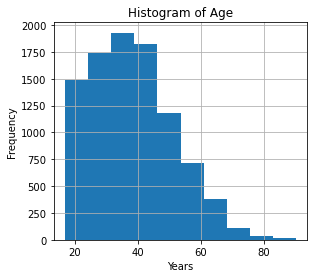

In [236]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Years')
ax1.set_ylabel('Frequency')
ax1.set_title("Histogram of Age")
adult["age"].plot(kind='hist', bins =10, grid=True)

Looking at the histogram for the numeric age variable, it appears to have a positively skewed distribution.

<AxesSubplot:title={'center':'Histogram of Hours per Week'}, xlabel='Hours per Week', ylabel='Frequency'>

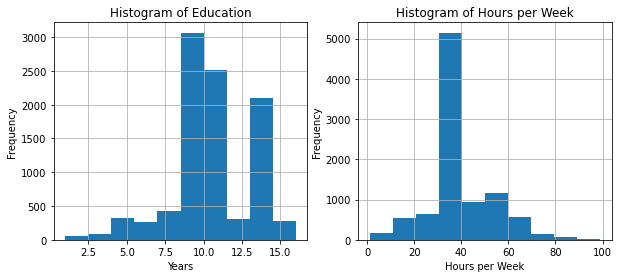

In [237]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Years')
ax1.set_ylabel('Frequency')
ax1.set_title("Histogram of Education")
adult["education"].plot(kind='hist', bins =10, grid=True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Hours per Week')
ax1.set_ylabel('Frequency')
ax1.set_title("Histogram of Hours per Week")
adult["hours-per-week"].plot(kind='hist', bins =10, grid=True)

Looking at the histograms for the education and hours-per-week numeric variables, the distribution of the education attribute appears to be slightly negatively skewed (with a large number of observations consolidated primarily within 3 distinct years), and the histogram of hours-per-week shows that 40 hours per week seems to be by far the most popular number of hours worked per week (substantially outweighing all other values).  

__Show value counts for categorical variables through bar graphs:__

<AxesSubplot:title={'center':'Bar plot of Marital Status'}, xlabel='Marital Status', ylabel='Number'>

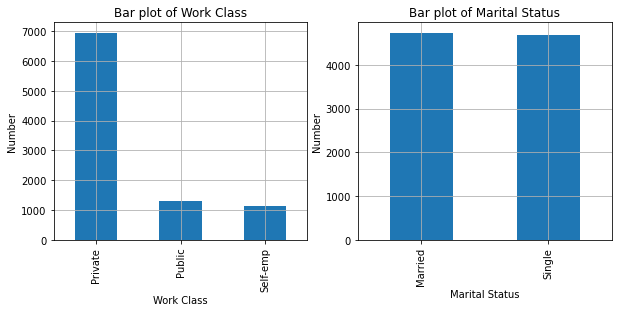

In [238]:
temp1 = adult["workclass"].value_counts()
temp2 = adult["marital-status"].value_counts()

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Work Class')
ax1.set_ylabel('Number')
ax1.set_title("Bar plot of Work Class")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Number')
ax1.set_title("Bar plot of Marital Status")
temp2.plot(kind='bar', grid = True)

Looking at the above bar graphs for the workclass and marital-status categorical variables, it appears that the vast majority of adults are employed in the private sector (nearly 7,000), and far fewer work in the public sector (~ 1,250) or are self-employed (~ 1,100).  The bar plot of the marital-status attritube shows that nearly half of the adults are married (~ 4,700), and half are single (~ 4,700).

<AxesSubplot:title={'center':'Bar plot of Sex'}, xlabel='Sex', ylabel='Number'>

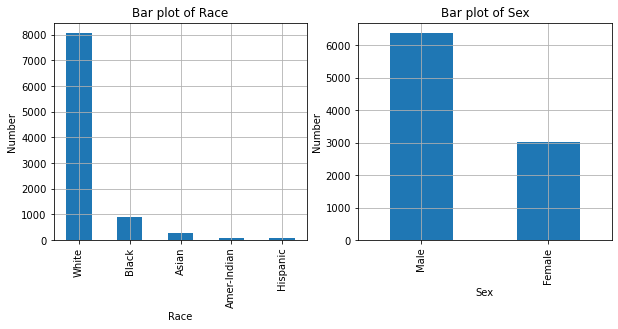

In [239]:
temp1 = adult["race"].value_counts()
temp2 = adult["sex"].value_counts()

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Race')
ax1.set_ylabel('Number')
ax1.set_title("Bar plot of Race")
temp1.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Number')
ax1.set_title("Bar plot of Sex")
temp2.plot(kind='bar', grid = True)

Looking at the above bar graphs of the categorical variables race and sex, it appears that the vast majority of adults in this dataset are white (~ 8,000), and less are black (~ 800), Asian (~ 250), American Indian (~ 100), or Hispanic (~ 100).  The bar plot of the sex variable shows that the majority of adults in this dataset are male (~ 6,300), and fewer are female (~ 3,000).  

<AxesSubplot:title={'center':'Bar plot of Income'}, xlabel='Income', ylabel='Number'>

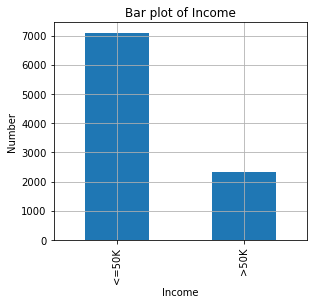

In [240]:
temp = adult["income"].value_counts()

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Income')
ax1.set_ylabel('Number')
ax1.set_title("Bar plot of Income")
temp.plot(kind='bar', grid = True)

The above bar graph of the categorical income variable shows that the majority of adults (~ 7,000) in this dataset have an income of less than or equal to 50,000, and fewer (~ 2,250) have an income of greater than 50,000.

## Perform cross-tabulations of education+race, work-class+income, work-class+race, and race+income (including bar graphs), create a table showing percentages of each race category that fall in the low-income group, and discuss results:

__Cross-tabulation of education+race:__

In [241]:
crosstab = pd.crosstab(adult["education"], adult["race"])
crosstab

race       Amer-Indian  Asian  Black  Hispanic  White
education                                            
1                    0      0      1         0     11
2                    0      1      4         3     38
3                    0      4      5         1     71
4                    5      5     14         6    150
5                    0      3     19         2    118
6                    8      3     30         4    223
7                    4      6     49         4    261
8                    0      2     17         3     78
9                   35     67    350        23   2590
10                  26     64    206        11   1818
11                   5     10     33         4    337
12                   4      5     33         3    259
13                   5     75    102         8   1387
14                   0     27     20         1    467
15                   0     11      5         2    153
16                   0      8      4         0    101

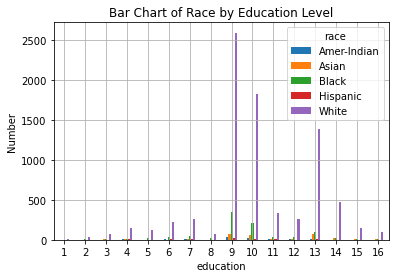

In [242]:
plt.show(crosstab.plot(kind="bar", title = "Bar Chart of Race by Education Level", ylabel = "Number", grid = True, rot=0))

From the above analyses, it is evident that the mode educational level (number of years) achieved across all races except for the Asian category of race is 9 (years).  The mode education for the Asian race is 13 (years). Also, there appears to be three distinct education levels (9 years, 10 years, & 13 years) that have by far the greatest number of adults falling into.

__Cross-tabulation of work-class+income:__

In [243]:
crosstab2 = pd.crosstab(adult["workclass"], adult["income"])
crosstab2

income     <=50K  >50K
workclass             
Private     5443  1504
Public       925   392
Self-emp     725   423

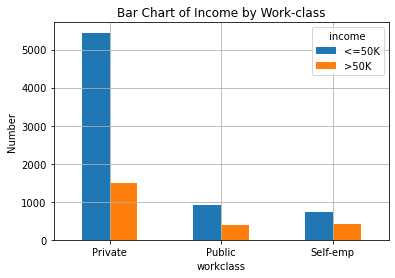

In [244]:
plt.show(crosstab2.plot(kind="bar", title = "Bar Chart of Income by Work-class", ylabel = "Number", grid = True, rot=0))

From the cross-tabulation between work-class & income, we can see that the private sector employs both the most low income (<= 50K) and high income (> 50K) adults, compared with the public sector and those that are self-employed.  This is to be expected, however, as the private sector overall employs a considerably larger proportion of adults compared with both the public sector and those that are self-employed.

__Cross-tabulation of work-class+race:__

In [245]:
crosstab3 = pd.crosstab(adult["workclass"], adult["race"])
crosstab3

race       Amer-Indian  Asian  Black  Hispanic  White
workclass                                            
Private             65    204    664        64   5950
Public              20     48    192         5   1052
Self-emp             7     39     36         6   1060

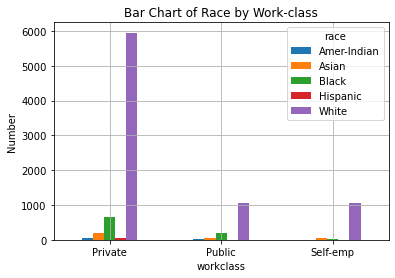

In [246]:
plt.show(crosstab3.plot(kind="bar", title = "Bar Chart of Race by Work-class", ylabel = "Number", grid = True, rot=0))

From the cross-tabulation between work-class and race, can see that the private sector category of the work-class attrtibute employs by far the most adults across all race categories. Again, this is to be expected due to the fact that the private sector employs bar far the greatest proportion of adults.

__Cross-tabulation of race+income:__

In [247]:
crosstab4 = pd.crosstab(adult["race"], adult["income"])
crosstab4

income       <=50K  >50K
race                    
Amer-Indian     83     9
Asian          224    67
Black          773   119
Hispanic        69     6
White         5944  2118

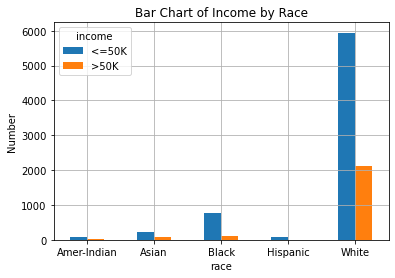

In [248]:
plt.show(crosstab4.plot(kind="bar", title = "Bar Chart of Income by Race", ylabel = "Number", grid = True, rot=0))

The cross-tabulation of race & income shows that whites are the highest earning race category (with the highest amount of both low-income adults and high-income adults).

__Table of percentages of each race that fall in the low income group (<=50K):__

In [249]:
table = crosstab4.apply(lambda r: r/r.sum(), axis=1)
table = table.drop(['>50K'], axis=1)
table

income          <=50K
race                 
Amer-Indian  0.902174
Asian        0.769759
Black        0.866592
Hispanic     0.920000
White        0.737286

The above table shows the percentages of each race that fall into the low income group (<= 50K).  Whites have the lowest percentage (73.7%) falling into the low income category (<= 50K).  Consequently, whites will implicity have the highest percentage of adults which fall into the high income category (not shown).

__Discuss observations from analyses:__

From the above analyses, it is evident that the mode educational level (number of years) achieved across all races except for the Asian category of race is 9 (years).  The mode education for the Asian race is 13 (years). From the cross-tabulation between work-class & income, we can see that the private sector employs both the most low income (<= 50K) and high income (> 50K) adults, compared with the public sector and those that are self-employed.  We can also see that the private sector category of the work-class attrtibute employs by far the most adults across all race categories from the cross-tabulation between work-class & race.  Finally, the cross tabulation of race & income shows that whites are the highest earning race category. This is also evident from analyzing the above table of percentages of each race that fall into the low income group (<= 50K).  Whites have the lowest percentage (73.7%) falling into the low income category (<= 50K).  Consequently, whites will implicity have the highest percentage of adults which fall into the high income category (not shown).

## Compare and contrast the characteristics of the low-income and high-income categories across the different attributes:

__Compare income & age:__

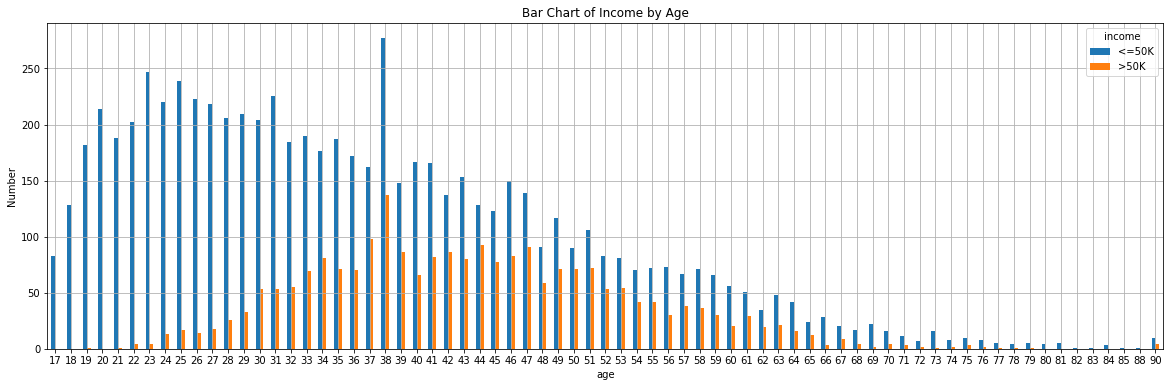

In [200]:
crosstab5 = pd.crosstab(adult["age"], adult["income"])
plt.show(crosstab5.plot(kind="bar", title = "Bar Chart of Income by Age", ylabel = "Number",grid = True, rot=0, figsize=(20,6)))

Looking at how the low-income (<= 50K) and high-income (> 50K) categories compare with the age attribute, we can see that younger ages tend to fall predominately in the low-income category. As age increases, there is an increase in the number of adults that fall into the high-income category (particularly from the early 30's to the mid to late 50's).  However, the number of adults falling into the high-income category never exceeds the number of adults falling into the low-income category at any age. The age of 38 appears to have the highest number of both low-income adults (~ 270) and high-income adults (~ 140). 

__Compare income & work-class:__

In [215]:
table2 = crosstab2.apply(lambda r: r/r.sum(), axis=1)
table2

income        <=50K      >50K
workclass                    
Private    0.783504  0.216496
Public     0.702354  0.297646
Self-emp   0.631533  0.368467

Looking at how the low-income and high-income categories compare with work-class, it appears that being self-employed yielded the highest percentage of adults with incomes falling in the high-income class (36.8%). The private sector had the lowest percentage of adults falling in the high-income category (21.6%), and the greatest percentage of adults falling in the low-income category (78.4%). The public category of work-class fell somewhere in the middle.

__Compare income & education:__

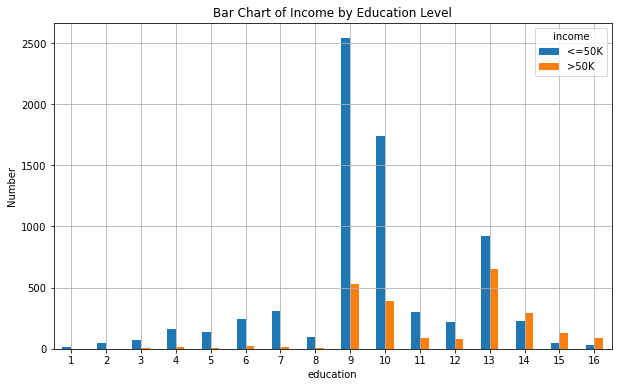

In [216]:
crosstab6 = pd.crosstab(adult["education"], adult["income"])
plt.show(crosstab6.plot(kind="bar", title = "Bar Chart of Income by Education Level", ylabel = "Number",grid = True, rot=0, figsize=(10,6)))

Looking at the above bar graph of income categories by educational level, we can see that the only educational levels where the number of high-income adults exceeded the number of low-income adults was for 14 or more years of education. For the low-income category of adults, the most prevalent number of years of education was 9 years (with over 2,500 adults). For the high-income category of adults, the most prevalent number of years of education was 13 years (with around 700 adults).

In [219]:
table6 = crosstab6.apply(lambda r: r/r.sum(), axis=1)
table6

income        <=50K      >50K
education                    
1          1.000000  0.000000
2          0.978261  0.021739
3          0.938272  0.061728
4          0.911111  0.088889
5          0.950704  0.049296
6          0.914179  0.085821
7          0.956790  0.043210
8          0.930000  0.070000
9          0.828385  0.171615
10         0.817412  0.182588
11         0.766067  0.233933
12         0.726974  0.273026
13         0.584020  0.415980
14         0.436893  0.563107
15         0.263158  0.736842
16         0.238938  0.761062

Additionally, the above table shows the percentages of low-income and high-income categories for each educational level. One of the most interesting takeaways is that as the years of education increases, the percentage of low-income adults steadily decreases and the percentage of high-income adults steadily increases, indicating that there seems to be a strong correlation between the number of years of education attained and higher incomes.

__Compare income & marital status:__

In [171]:
crosstab7 = pd.crosstab(adult["marital-status"], adult["income"])
table3 = crosstab7.apply(lambda r: r/r.sum(), axis=1)
table3

income             <=50K      >50K
marital-status                    
Married         0.576314  0.423686
Single          0.933262  0.066738

Interpreting the above table, it appears that the vast majority of single adults (93.3%) fall into the category of low-income earners, while married adults are more evenly split, with 57.6% of married adults falling into the low-income category and 42.4% of married adults falling into the high-income category.

__Compare income & race:__

In [172]:
table4 = crosstab4.apply(lambda r: r/r.sum(), axis=1)
table4

income          <=50K      >50K
race                           
Amer-Indian  0.902174  0.097826
Asian        0.769759  0.230241
Black        0.866592  0.133408
Hispanic     0.920000  0.080000
White        0.737286  0.262714

The highest percentage of adults that fall into the high-income category are white (26.27%), followed closely by Asians (~ 23%). Hispanics have the lowest percentage of adults that fall into the high-income category (8%), or the highest percentage falling into the low-income category. Blacks and American Indians also appear to have very high percentages of adults falling into the low-income category (86.7% & 90.2% respectively).

__Compare income & sex:__

In [175]:
crosstab8 = pd.crosstab(adult["sex"], adult["income"])
table5 = crosstab8.apply(lambda r: r/r.sum(), axis=1)
table5

income     <=50K      >50K
sex                       
Female  0.881149  0.118851
Male    0.693091  0.306909

A higher percentage of males (30.7%) fall into the high-income category, compared to that of females (only 11.89%). Conversely, a higher percentage of females (88.11%) fall into the low-income category compared with that of males (69.3%).

__Compare income & hours per week:__

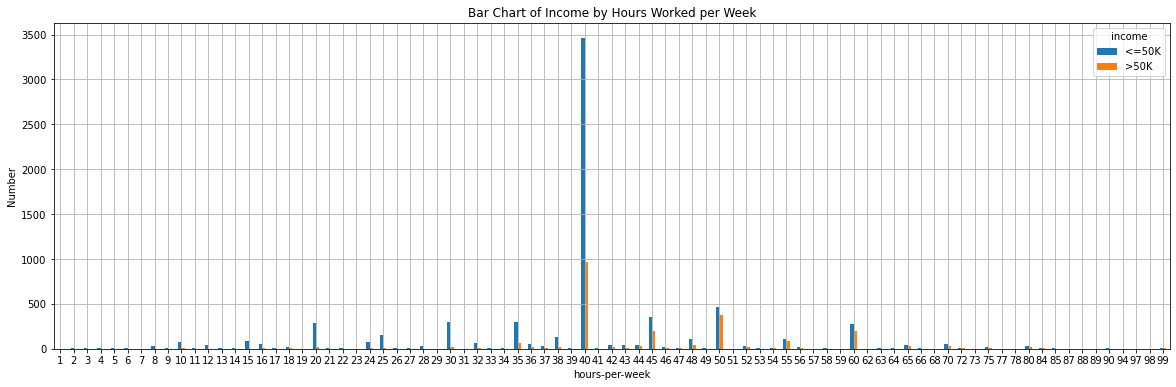

In [180]:
crosstab9 = pd.crosstab(adult["hours-per-week"], adult["income"])
plt.show(crosstab9.plot(kind="bar", title = "Bar Chart of Income by Hours Worked per Week", ylabel = "Number",grid = True, rot=0, figsize=(20,6)))

The highest number of hours worked per week for both low-income adults and high-income adults is 40 hours per week (almost 3,500 low-income adults & nearly 1,000 high-income adults). There also appears to be a spike in hours worked per week at 50 hours (close to 500 low-income adults and around 400 high-income adults). 

## 3-B: Predictive Modeling and Model Evaluation:

__Create dummy variables for categorical attributes, separate target attribute (income > 50K), and drop low-income:__

In [250]:
adult = pd.get_dummies(adult)
adult.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0   39         13              40                  0                 1   
1   50         13              13                  0                 0   
2   38          9              40                  1                 0   
3   53          7              40                  1                 0   
4   28         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  income_<=50K  income_>50K  
0           0         1             1            0  
1           0         1             1            0  
2           0         1             1            0  
3           0         1             1            0  
4           1         0             1            0

In [251]:
target = adult["income_>50K"]
target.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [252]:
adult = adult.drop('income_<=50K', 1)
adult = adult.drop('income_>50K', 1)
adult.head()

age  education  hours-per-week  workclass_Private  workclass_Public  \
0   39         13              40                  0                 1   
1   50         13              13                  0                 0   
2   38          9              40                  1                 0   
3   53          7              40                  1                 0   
4   28         13              40                  1                 0   

   workclass_Self-emp  marital-status_Married  marital-status_Single  \
0                   0                       0                      1   
1                   1                       1                      0   
2                   0                       0                      1   
3                   0                       1                      0   
4                   0                       1                      0   

   race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
0                 0           0           0              0           1   
1                 0           0           0              0           1   
2                 0           0           0              0           1   
3                 0           0           1              0           0   
4                 0           0           1              0           0   

   sex_Female  sex_Male  
0           0         1  
1           0         1  
2           0         1  
3           0         1  
4           1         0

__Build Naive Bayes (Gaussian) classifier, perform 10-fold cross-validation, & show overall accuracy:__

In [255]:
# build Naive Bayes classifier & perform 10-fold cross-validation:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(adult, target)

cv_scores1 = model_selection.cross_val_score(nbclf, adult, target, cv=10)
cv_scores1

array([0.72823779, 0.70488323, 0.73113709, 0.70669501, 0.73219979,
       0.70563231, 0.7120085 , 0.7183847 , 0.73113709, 0.7077577 ])

In [256]:
# cross-validation scores average accuracy for Naive Bayes classifier:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores1.mean(), cv_scores1.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


__Build decision tree classifier (using "entropy" as selection criteria), perform 10-fold cross-validation, & show overall accuracy:__

In [257]:
# build decision tree classifier (entropy as selection criteria) & perform 10-fold cross-validation:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(adult, target)

cv_scores2 = model_selection.cross_val_score(treeclf, adult, target, cv=10)
cv_scores2

array([0.76645435, 0.75796178, 0.77577046, 0.77683316, 0.77045696,
       0.75664187, 0.75132837, 0.78533475, 0.77364506, 0.75982997])

In [260]:
# cross-validation scores average accuracy for decision tree classifier:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores2.mean(), cv_scores2.std() * 2))

Overall Accuracy: 0.77 (+/- 0.02)


__Build LDA classifier, perform 10-fold cross-validation, & show overall accuracy:__

In [259]:
# build linear discriminant analysis (LDA) classifier & perform 10-fold cross-validation:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(adult, target)

cv_scores3 = model_selection.cross_val_score(ldclf, adult, target, cv=10)
cv_scores3

array([0.81210191, 0.80997877, 0.79277365, 0.81721573, 0.80977683,
       0.78852285, 0.80021254, 0.80765143, 0.82146652, 0.81615303])

In [262]:
# cross-validation scores average accuracy for LDA classifier:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores3.mean(), cv_scores3.std() * 2))

Overall Accuracy: 0.81 (+/- 0.02)


__Generate a visualization of decision tree model:__

In [268]:
export_graphviz(treeclf, out_file='tree.dot', feature_names = adult.columns)

In [269]:
system(dot -Tpng tree.dot -o dtree.png)

['dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.408801 to fit']

In [275]:
from IPython.display import Image
Image(filename='dtree.png', width=1000)

The above decision tree is very difficult to see due to its size. I will submit a separate png file along with this assignment that can be zoomed in on if needed.